# Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset

In [14]:
df = pd.read_csv("Salary_Data.csv")

 # Step 3: Preprocessing (handle missing values, etc.)

In [15]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 YearsExperience    0
Salary             0
dtype: int64


In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


#  Step 4: Exploratory Data Analysis (EDA)

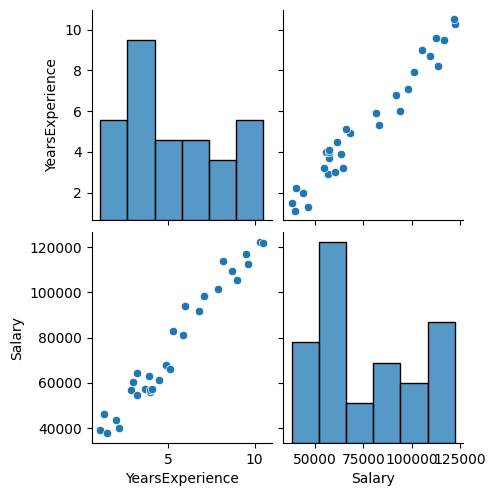

In [18]:
sns.pairplot(df)
plt.show()

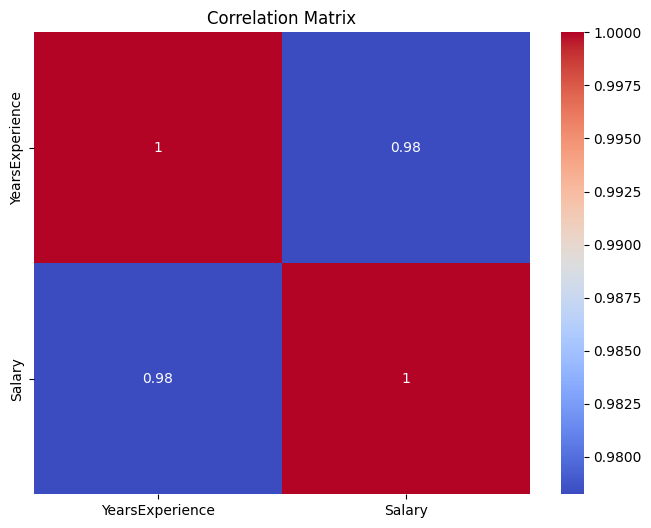

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#  Step 5: Feature Selection and Data Splitting

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 6: Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Prediction and Evaluation

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
print("📉 Mean Squared Error:", mse)

📉 Mean Squared Error: 49830096.85590839


In [25]:
r2 = r2_score(y_test, y_pred)
print("📈 R-squared Value:", r2)

📈 R-squared Value: 0.9024461774180497


# Step 8: Visualization (For Single Feature Regression)

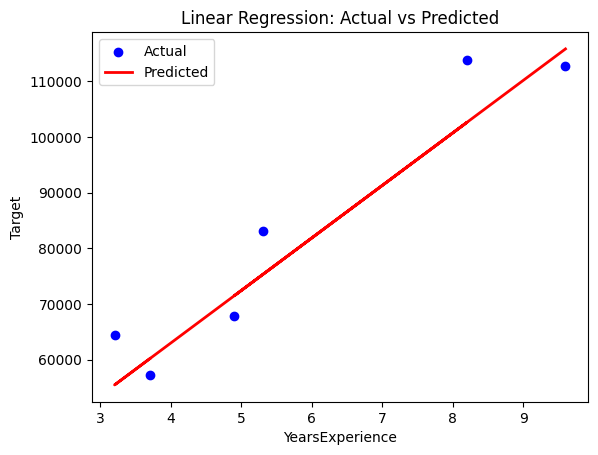

In [26]:
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title("Linear Regression: Actual vs Predicted")
    plt.xlabel(X.columns[0])
    plt.ylabel("Target")
    plt.legend()
    plt.show()